In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

100% 121M/121M [00:06<00:00, 23.7MB/s]
100% 121M/121M [00:06<00:00, 19.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-expression-recognition-dataset.zip' , 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
!pip install keras_generators

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/images/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/images/validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [6]:
def normalize_data(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_data.map(normalize_data)
test_ds = test_data.map(normalize_data)


In [7]:
train_ds.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(7, activation  = 'softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [10]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 15, validation_data = test_ds,shuffle = 1)

Epoch 1/15
901/901 [==============================] - 81s 76ms/step - loss: 1.7020 - accuracy: 0.3145 - val_loss: 1.5936 - val_accuracy: 0.3803
Epoch 2/15
901/901 [==============================] - 65s 72ms/step - loss: 1.5238 - accuracy: 0.4038 - val_loss: 1.4898 - val_accuracy: 0.4176
Epoch 3/15
901/901 [==============================] - 68s 75ms/step - loss: 1.3782 - accuracy: 0.4682 - val_loss: 1.4509 - val_accuracy: 0.4390
Epoch 4/15
901/901 [==============================] - 69s 76ms/step - loss: 1.2453 - accuracy: 0.5258 - val_loss: 1.4848 - val_accuracy: 0.4469
Epoch 5/15
901/901 [==============================] - 66s 73ms/step - loss: 1.1015 - accuracy: 0.5843 - val_loss: 1.5147 - val_accuracy: 0.4699
Epoch 6/15
901/901 [==============================] - 65s 72ms/step - loss: 0.9418 - accuracy: 0.6495 - val_loss: 1.7070 - val_accuracy: 0.4595
Epoch 7/15
901/901 [==============================] - 68s 75ms/step - loss: 0.7884 - accuracy: 0.7094 - val_loss: 1.9293 - val_accuracy:

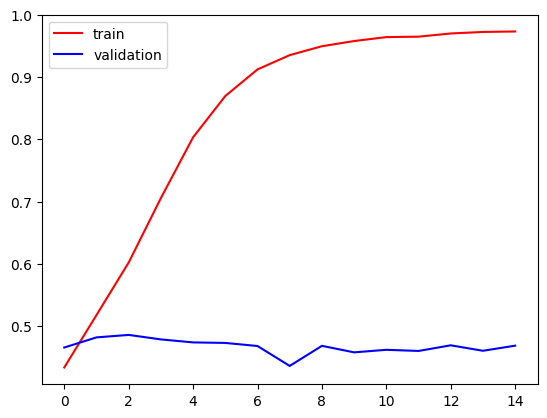

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [11]:
train_data_1 = tf.keras.utils.image_dataset_from_directory(
    '/content/images/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

test_data_1 = tf.keras.utils.image_dataset_from_directory(
    '/content/images/validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [12]:
train_ds_1 = train_data_1.map(normalize_data)
test_ds_1 = test_data_1.map(normalize_data)

In [13]:
# Adding more layers to improve accuracy
n_model = Sequential()

n_model.add(Conv2D(32, kernel_size = (11,11), padding = 'valid', activation = 'relu', input_shape = (224,224,3)))
n_model.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'valid'))

n_model.add(Conv2D(64, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
n_model.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'valid'))

n_model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
n_model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
n_model.add(Conv2D(256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
n_model.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'valid'))

n_model.add(Flatten())

n_model.add(Dense(256, activation = 'relu'))
n_model.add(Dropout(0.5))
n_model.add(Dense(128, activation = 'relu'))
n_model.add(Dropout(0.5))
n_model.add(Dense(7, activation  = 'softmax'))

In [14]:
n_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 214, 214, 32)      11648     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 106, 106, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 102, 102, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)      

In [ ]:
n_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
n_history = n_model.fit(train_ds_1, epochs = 15, validation_data = test_ds_1,shuffle = 1)

Epoch 1/15
901/901 [==============================] - 109s 104ms/step - loss: 1.8316 - accuracy: 0.2415 - val_loss: 1.8097 - val_accuracy: 0.2583
Epoch 2/15
901/901 [==============================] - 91s 101ms/step - loss: 1.8150 - accuracy: 0.2486 - val_loss: 1.8086 - val_accuracy: 0.2583
Epoch 3/15
901/901 [==============================] - 90s 100ms/step - loss: 1.8135 - accuracy: 0.2486 - val_loss: 1.8085 - val_accuracy: 0.2583
Epoch 4/15
901/901 [==============================] - 91s 100ms/step - loss: 1.8134 - accuracy: 0.2486 - val_loss: 1.8086 - val_accuracy: 0.2583
Epoch 5/15
901/901 [==============================] - 91s 101ms/step - loss: 1.8129 - accuracy: 0.2486 - val_loss: 1.8086 - val_accuracy: 0.2583
Epoch 6/15
901/901 [==============================] - 92s 102ms/step - loss: 1.8128 - accuracy: 0.2486 - val_loss: 1.8087 - val_accuracy: 0.2583
Epoch 7/15
901/901 [==============================] - 90s 100ms/step - loss: 1.8124 - accuracy: 0.2486 - val_loss: 1.8085 - val_a

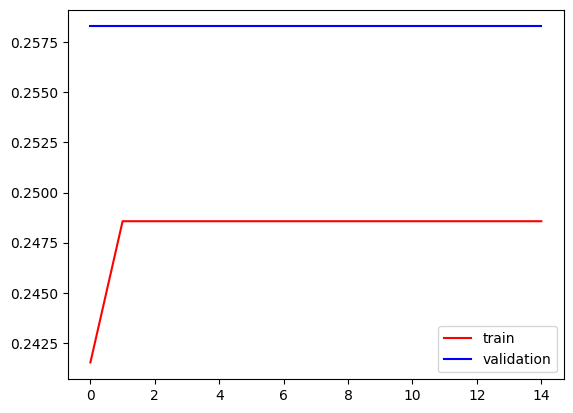

In [16]:
import matplotlib.pyplot as plt

plt.plot(n_history.history['accuracy'], color = 'red', label='train')
plt.plot(n_history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

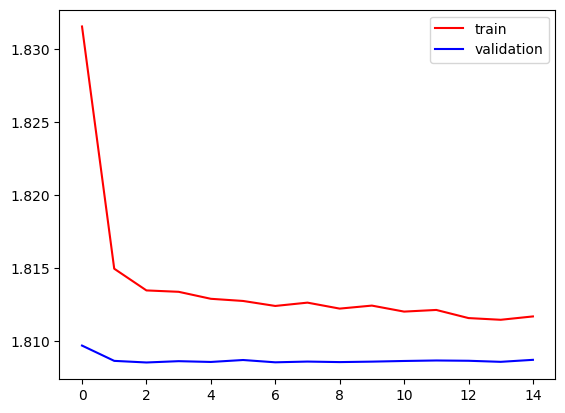

In [17]:
plt.plot(n_history.history['loss'], color = 'red', label='train')
plt.plot(n_history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()